In [1]:
## HTML script that allows me to hide all the code cells at first, but allows the user to toggle the code 
## to be visible for trouble shooting.
from IPython.display import HTML, display

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
</script>''')

# BIKES & CO. RENTAL DEMAND FORCASTING MODEL

In [2]:
## All necessary imports for the data analysis, visualizations, and machine learning model.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib widget

In [3]:
## Code that runs to import the data from the historical.
## This is also the code that is used to clean and transform the timestamp column into 3 new columns for the 
## Month, Date, Hour.

data_set = pd.read_csv("bike_data.csv")

data_set.timestamp = pd.to_datetime(data_set.timestamp)

data_set['Month'] = data_set.timestamp.dt.month
data_set['Day'] = data_set.timestamp.dt.day
data_set['Hour'] = data_set.timestamp.dt.hour

### Historical Data Visualization
Below are graphical representations of the historical data provided. 
These graphs are broken up into 3 visualizations that show the relationship between a given variable 
and the number of bike rentals. 
To further interact with these graphs, use the tool bar located on the side of each graph.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
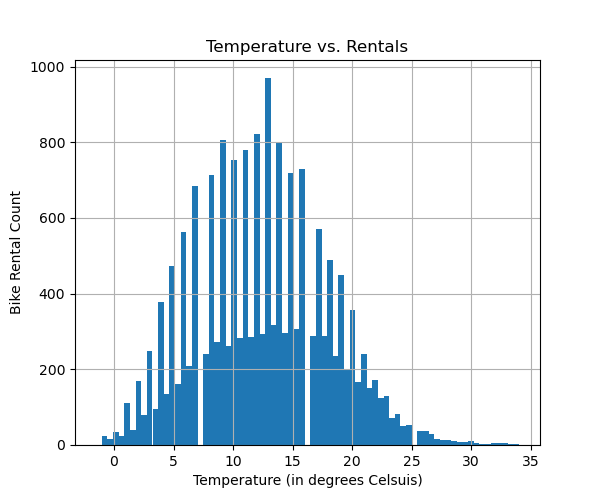

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
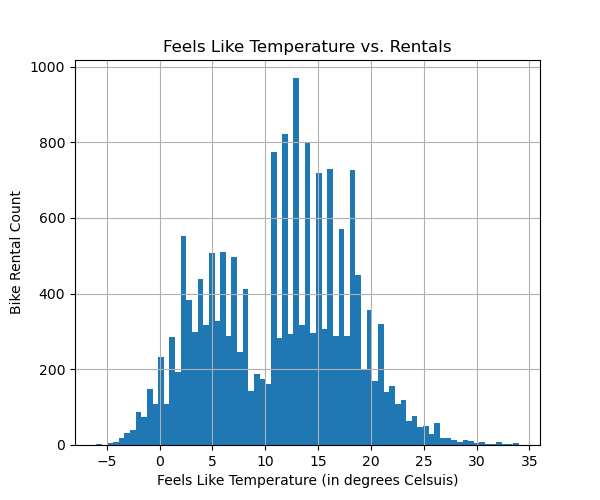

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
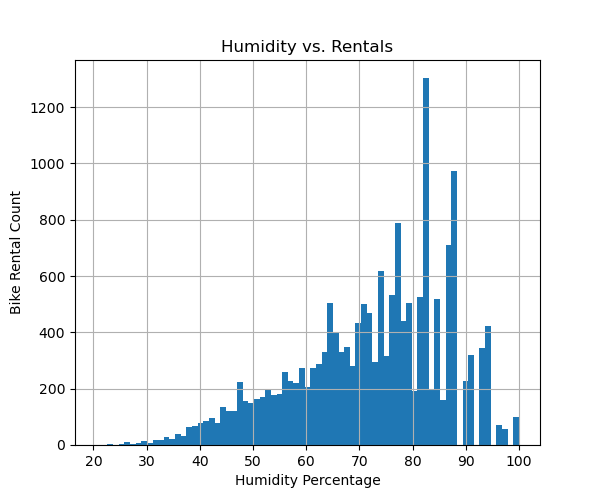

In [4]:
## Code below is used to generate the 3 interactive histogram graphs used as my descriptive method for the project.

fig = plt.figure(figsize=(6,5))
ax = fig.gca()
feature = data_set['t1']
feature.hist(bins = 75, ax=ax)
ax.set_title("Temperature vs. Rentals")
ax.set_xlabel("Temperature (in degrees Celsuis)")
ax.set_ylabel("Bike Rental Count")
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.gca()
feature = data_set['t2']
feature.hist(bins = 75, ax=ax)
ax.set_title("Feels Like Temperature vs. Rentals")
ax.set_xlabel("Feels Like Temperature (in degrees Celsuis)")
ax.set_ylabel("Bike Rental Count")
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.gca()
feature = data_set['hum']
feature.hist(bins = 75, ax=ax)
ax.set_title("Humidity vs. Rentals")
ax.set_xlabel("Humidity Percentage")
ax.set_ylabel("Bike Rental Count")
plt.show()

In [5]:
## This block of code is used for preparing the historical data for the machine learning model. 
## In this we create 4 data frames that will be used for the training of the model and then subsequent testing
## In addition, a scaler has been added to normalize each data column to remove the mean and scales them to a unit 
## varience. This assists the machine learning model in more accurate training.

X = data_set.drop(["timestamp","cnt"], axis = 1)
y = data_set["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train[['t1', 't2', 'hum', 'wind_speed', 'month', 'day', 'hour']] = scaler.fit_transform(
                                                                    X_train[['t1', 't2', 'hum', 
                                                                             'wind_speed', 'Month', 'Day', 'Hour']])
X_test[['t1', 't2', 'hum', 'wind_speed', 'month', 'day', 'hour']] = scaler.fit_transform(
                                                                    X_test[['t1', 't2', 'hum', 
                                                                            'wind_speed', 'Month', 'Day', 'Hour']])

In [6]:
## This code is the model being fit and then scored based on the training and test data respectively. 
## At the end of the execution, the score is than printed out to show how accurate our model is.

model = RandomForestRegressor()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
percentage = "{:.0%}".format(score)
print("This ensemble model is " + percentage + " accurate.")

This ensemble model is 96% accurate.


## Future Predictions
The chart below is the result of the upload of future weather data that is going to be used to predict the demand for bike rentals. The table below shows the inputted Month, Day, and Hour along with the anticipated demand for each.

In [7]:
## This code block reads in the user input file, in this case "Demo.csv" and completes a scalar operation to normalize
## the data. Once complete, the model is then run on this data set and then printed out in a DataFrame to give the
## user a visual of the predicted values. 
future_data = pd.read_csv("Demo.csv")

future_data[['t1', 't2', 'hum', 'wind_speed', 'month', 'day', 'hour']] = scaler.fit_transform(
                                                                    future_data[['t1', 't2', 'hum',       
                                                                           'wind_speed', 'Month', 'Day', 'Hour']])

predictions = model.predict(future_data)


future_data["Predicted Rentals"] = predictions.astype(int)
future_data[["Month","Day","Hour","Predicted Rentals"]]

,Month,Day,Hour,Predicted Rentals
0,1,4,0,231
1,1,4,1,164
2,1,4,2,177
3,1,4,3,132
4,1,4,4,70
...,...,...,...,...
17409,1,3,19,1331
17410,1,3,20,629
17411,1,3,21,415
17412,1,3,22,297
